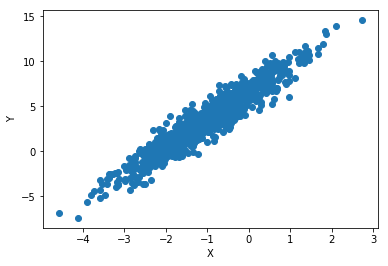

covariance matrix of File1:
 [[ 1.04991622  3.14373697]
 [ 3.14373697 10.44232481]]

 correlation matrix of File1:
 [[1.         0.94944603]
 [0.94944603 1.        ]]

 Eigenvectors of Correlation matrix of File1: 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

 Eigenvalues of Correlation matrix of File1: 
[1.94944603 0.05055397]

 pairs: [(1.949446026724036, array([ 0.70710678, -0.70710678])), (0.050553973275963004, array([0.70710678, 0.70710678]))]
Eigenvalues in descending order:
1.949446026724036
0.050553973275963004
the principle components are:
 PC1: [ 0.70710678 -0.70710678] 
 PC2: [0.70710678 0.70710678]

 covariance matrix of File2:
 [[ 0.9528516   2.88094852 -0.06656913  0.01808025 -0.04847952]
 [ 2.88094852  9.70755876 -0.24361655  0.08729034 -0.12363643]
 [-0.06656913 -0.24361655  2.89654169  0.0719737  -0.02949331]
 [ 0.01808025  0.08729034  0.0719737   3.45612595 -1.42338742]
 [-0.04847952 -0.12363643 -0.02949331 -1.42338742  2.44235468]]

 correlation matrix of 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.decomposition import PCA

# 1) Read file homework_01_2d-datafile.csv into a dataframe using pandas
File1='homework_01_2d-datafile.csv'
df1=pd.read_csv(File1)
df1 = pd.read_csv('homework_01_2d-datafile.csv', usecols=['X','Y'])
# plot them as points
x=df1['X']
y=df1['Y']  
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
#aggiungere commenti!!!
def c_matrix(num_var,data):  
    for n in range(num_var+1):
        def diff_mean(var):          # difference between the variable value and its mean defined for all variables
            var_mean= np.mean(var)
            return var-var_mean
        cov = np.zeros((num_var,num_var), dtype=float)  #return an array of shape (num_var,num_var), filled with zeros
        corr = np.zeros((num_var,num_var), dtype=float)  #return an array of shape (num_var,num_var), filled with zeros
        column_name=list(data)
        var=np.array(np.var(data))  #return a list of column names of dataFrame
        for i, j in np.ndindex(cov.shape):
            cov[i,j]=np.dot(diff_mean(data[column_name[i]]),diff_mean(data[column_name[j]]))/(len(data)-1)   #compute the dot product of two arrays:i-th and j-th columns of dataFrame
            corr[i,j]=np.dot(diff_mean(data[column_name[i]]),diff_mean(data[column_name[j]]))/(len(data)*np.sqrt(var[i]*var[j])) #to normalize the correlation coefficient

    return cov,corr



# 2) Find the covariance matrix for the two variables.  
cov,corr=c_matrix(2,df1)  #covariance matrix

print('covariance matrix of File1:\n',cov)
print('\n correlation matrix of File1:\n',corr)
# Are they correlated? (Remember to normalize the correlation coefficient.)
#Yes, the two variables are correlated


# 3) Decompose the covariance matrix using an eigenvalue decompositions (There are python functions for this.)
eig_vals, eig_vecs = LA.eig(corr)
print('\n Eigenvectors of Correlation matrix of File1: \n%s' %eig_vecs)
print('\n Eigenvalues of Correlation matrix of File1: \n%s' %eig_vals)

 # What are the principle components of the data?


# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(eig_vals[i], eig_vecs[i,:]) for i in range(len(eig_vals))]
print('\n pairs:',eig_pairs)
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# the list is sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

#The principle components are the eigenvectors with the biggest eigenvalues
print('the principle components are:\n PC1:',eig_vecs[0,:],'\n PC2:',eig_vecs[1,:])


    
# 4) Do 1 through 3, but using the data file homework_01_5d-datafile.csv this time.
#    In this case the data is 5 dimensional.

# 1) Read file homework_01_2d-datafile.csv into a dataframe using pandas
File2='homework_01_5d-datafile.csv'
df2=pd.read_csv(File2)
df2 = pd.read_csv('homework_01_5d-datafile.csv', usecols=['X1','X2','X3','X4','X5'])

# 2) Find the covariance and correlation matrices for the five variables.  
cov_2,corr_2=c_matrix(5,df2)  

print('\n covariance matrix of File2:\n',cov_2)
print('\n correlation matrix of File2:\n',corr_2)
    # Which variables seems to be correlated with each other and which ones not?
# Variable X1 seems to be correlated with variable X2 and variable X4 with X5, while variable X1 does not seem to be 
#correlated with variable X4
# 3) Decompose the covariance matrix using an eigenvalue decompositions (There are python functions for this.)
eig_vals2, eig_vecs2 = LA.eig(corr_2)
print('\n Eigenvectors of Correlation matrix of File2: \n%s' %eig_vecs2)
print('\n Eigenvalues of Correlation matrix of File2: \n%s' %eig_vals2)


# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs2 = [(eig_vals2[i], eig_vecs2[i,:]) for i in range(len(eig_vals2))]
print('\n pairs:',eig_pairs2)
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs2.sort()
eig_pairs2.reverse()

# the list is sorted by decreasing eigenvalues
print('\n Eigenvalues in descending order:')
for i in eig_pairs2:
    print(i[0])

#The principle components are the eigenvectors with the biggest eigenvalues
print('\n the principle components are:\n PC1:',eig_vecs2[0,:],'\n PC2:',eig_vecs2[2,:],'\n PC3:',eig_vecs2[3,:])

    